
# LAB A: Fourier Analysis

In this lab, you will dive into signal generation and analysis focusing on Fourier theory. In short, Fourier demonstrated that any periodic signal can be expressed as a sum of sinusoidal functions with a common period. This is one step towards understanding both time-domain and frequency-domain analysis to describe signal characteristics.


<img src="0_Intro.jpg" alt="Fourier Example" width="1000px">

In the instructions, some steps have been left out deliberately to allow you to explore the tool and familiarize yourself with it. However, don't hesitate to ask for help if needed. While we won't guide you through each section step by step, we encourage you to seek assistance if you've tried everything and still need support rather than struggling in silence.

Throughout this course, including this lab, we will use the program Jupyter Notebook. Additionally, we will utilize CircuitLab, an online tool for circuit simulations. CircuitLab is based on the Spice network, which is extensively used in the industry. It is the same software used in FYS1210 and is generally straightforward to use. However, if you encounter difficulties, such as adding a resistor, don't hesitate to ask for help.

<span style="font-size: 24px; color: red; font-weight: bold;">Hand inn: <span>

Your submission document should be in ".pdf" format and adhere to the following naming convention: "FYS3220_LAB_Y_Vxx_Username.pdf," where Y represents the letter of the lab (A in this case), Vxx corresponds to V24 for the 2024 course, and Username is your UIO username. You may also include the .ipynb file and all relevant files as a .zip archive in the folder, but the .pdf should contain everything necessary for grading your lab.

# (1) Summing electrical signals

Throughout the history of electronics, engineers and scientists have strived to develop innovative ways to process and manipulate signals efficiently and accurately. One fundamental task in many electronic systems is the combination or summing of multiple input signals into a single output signal. This is where summing circuits come into play, providing a versatile solution to this common problem.

Summing circuits, also known as adder circuits, are electronic circuits designed to combine two or more input signals and produce a resultant output signal that represents their algebraic sum. The advent of operational amplifiers (Op-Amps) revolutionized the design and implementation of summing circuits, making them more precise, flexible, and reliable.

Summing circuits are widely used in signal processing (both audio and otherwise) and in control systems. One of the first uses of the summing circuit was in radio communication, to add a signal upon a carrier wave.

<img src="1_Summing_circuit_example.png" alt="Summing Circuit" width="400px">

Above is a summing circuit. Using our knowledge of how no current goes through the terminals of the Op-Amp, we are left with the formula ($I_4 = I_F$ and $R_4 = R_F$ which is common practice when refering to the feedback values):

$$I_f = I_{i_1} + I_{i_2} + I_{i_3} = \frac{V_1}{R_1} + \frac{V_2}{R_2} + \frac{V_3}{R_3}$$

We may then use the known formula (which we expect you to be able to derive yourself) for the inverted Op-Amp:

$$ V_{out} = - \frac{R_f}{R_i} \cdot V_{in}$$

giving us (in the case of $R_1 = R_2 = R_3 = R_i$):

$$ V_{out} = -\frac{R_f}{R_i} \cdot (V_1 + V_2 + V_3)$$

or (in the case $R_1 \neq R_2 \neq R_3$):

$$ V_{out} = - R_f \cdot \left(\frac{V_1}{R_1} + \frac{V_2}{R_2} + \frac{V_3}{R_3}\right)$$


### (a) Summing Electrical Signals:

As an easy-to-get-going starting task, you will now implement your own summing circuit in CircuitLab and add together 3 sinusoidal voltage generators.

- [ ] Using the shown summing circuit, change the inputs to sinusoidal voltage sources. Keep the frequency in the range of 200-1000 Hz and the voltage in the range of 0.2-1 V.

- [ ] Add a new inverter at the end to ensure the final output matches the phase of the input.

- [ ] Perform a time simulation of the output. Choose your parameters so that you can observe the contributions of each signal. You may choose to create two plots: one showing a longer stretch of time and another showing half a wave of the signal.

- [ ] What limits the input and output voltages in the case of a real OpAmp?

Save your circuit (Edit -> Export PNG) and your plot (use the Export Plot Images button on the plot), and add them to this LAB document.

<span style="font-size: 24px; color: red; font-weight: bold;">Your answer here: <span>


(this text can be removed) you can use several options in adding pictures in markdown format. One in jupyter notebook is: edit->insert image. Another and far more reliable method is to have the image in the same folder as the .ipynb file and do: (the cell under cann be removed)

<img src="grafer.png" alt="Text if image not available" width="1000px">

<img src="grafer2.png" alt="Text if image not available" width="1000px">

<img src="krets1a.png" alt="Text if image not available" width="1000px">

# (2) Frequency Spectrum of Any Given Signal:

According to Fourier’s theory, any given signal v(t) can be approximated using a series of sinusoidal and cosine signals with appropriate amplitudes. Instead of describing a signal v(t) in the time domain, it is often easier to describe the signal by using its frequency components. However, there are cases where it can be challenging to find the finite number of cosine signals to recreate a given signal. Can you think of such a case?

<img src="2_complexsingal_example.png" alt="Complex signal example" width="800px">

Above is a "complex" sinusoidal signal. We know it can be approximated with a series of single sinusoidal signals, and we may be able to guess some frequencies and amplitudes from the graph, but getting it one hundred percent right might be difficult. In this case, the dominating signal (the one with the highest amplitude) is perhaps the easiest to guess. When reconstructing a signal with sinusoids, we often stop at some n-number of sinusoids when adding more does not significantly change the outputting signal. Adding more sinusoids would likely help recreate the signal more accurately, but if we have to do it with physical components, then we need to consider the cost in terms of area or price.

### FFT (Fast Fourier Transform):

To find the frequency components of a given signal, we often use Fast Fourier Transform (FFT). You can learn how to do a normal Fourier Transform in the textbook (Chapter 14, page 717). We highly recommend learning how to do it by hand so that you have a better understanding of how to code an FFT solution and how to debug when the output doesn't match expectations.

You can follow **[this guide](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html)** to see how to implement an FFT solution in Python. Underneath, I have used the `FFT.py` file with some parameters. Feel free to edit the `FFT.py` file (though we suggest creating your own `my_FFT.py` as our uses depend on the original). You can add some very nice plotting functionality if you have the time. Modifying the file will also give you insight into how the FFT works. There is also a `FFT_simple.py` that contains just the necessities.

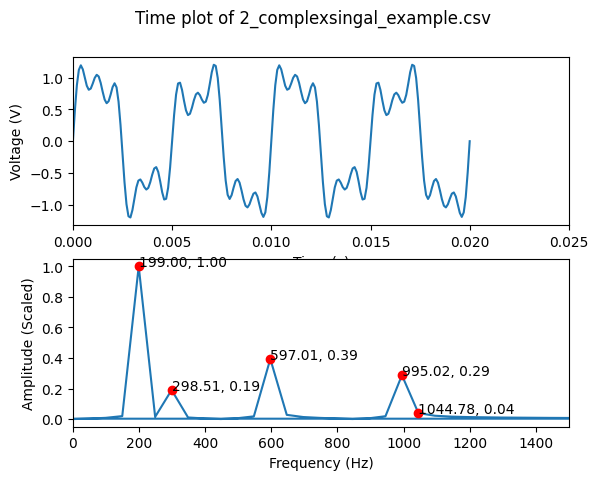

In [2]:
# we can use % to run some magical commant supported in jupyter (like %run, to run a .py file in the same folder)

# This file uses keyword arguments, which means we have to use "-?" before each argv specifying what the argv is:
# e.i "-f 'some_file.png' " is for just the -csv file. 

# the accepted keywords are:
# --filename (-f)  : the csv file
# --xlim (-x)      : the xlimit_max on plotting in both, use "time_limit, fft_limit"
# --scaling (-s)   : the scale (if any to multiply the data with, e.i turning mV into V)
# --decimator (-d) : the divident from the highest peak that will be annotated (3 is default), yes/y is also accepted
# --plotting (-p)  : the type of plot to create. time/fft/both

%run FFT.py -f "2_complexsingal_example.csv" -x 0.025,1500 -s 1 -d y --plotting both

As we can see from the output above, we can recognize four distinct sinusoidal signals that make up the whole. Due to the FFT being a numerical code, we can expect some rounding errors. The proper sinusoids were made with frequencies 200/300/600/1000 Hz, but the numbers given here would have been close enough to approximate the same signal. If we captured a longer signal, the numerical solution would be more accurate.

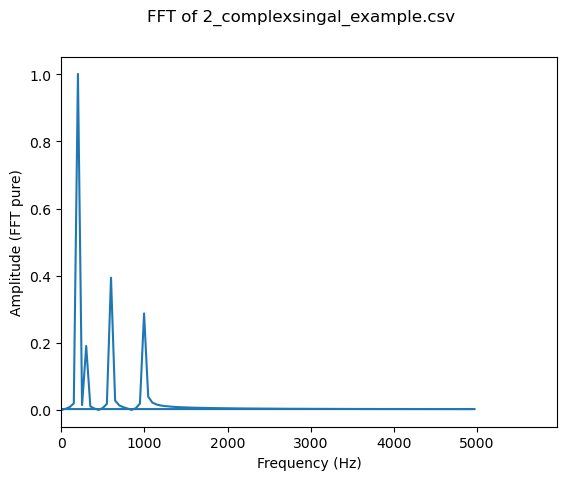

In [2]:
# the simplest way to run FFT.py is just calling with the name of the file. you can then later change the params.
%run FFT.py -f "2_complexsingal_example.csv"

To mathematically express a signal using a summation of sine/cosine signals, we use the formula:

$$v(t) = dc + \sum_{n=1}^k a_n \cos(n \omega_0 t) + b_n \sin(n \omega_0 t)$$

Here, we need to find a fundamental frequency where we can express the other frequencies as multiples. For our example case, we could use $ 100 Hz$ as 200/300/600/1000 can be expressed using it. Our FFT does not seem to have a DC component, and we can also guess that based on the fact that the signal oscillates around zero. The $a_n$ and $b_n$ values end up being a list of the amplitudes at the given multiple of the fundamental frequency.

For our example, this becomes:

$$v(t) = \sum_{n=1}^k b_n \sin(2 \pi \cdot 0.1 k Hz \cdot n)$$
$$b_n = [0, 1, 0.2, 0, 0, 0.4, 0, 0, 0, 0.3]$$

In this case, since the signal is zero at $t=0$, we can guess it is a sinusoidal signal and use $b_n$ for our amplitudes. We could also write out the equation fully:

$$v(t) = 1 \cdot \sin(2 \pi \cdot 0.2 k Hz) + 0.2 \cdot \sin(2 \pi \cdot 0.3 k Hz) + 0.4 \cdot \sin(2 \pi \cdot 0.6 k Hz) + 0.3 \cdot \sin(2 \pi \cdot 1 k Hz)$$

### (a) Simulating a Custom Mix of Frequency Components:

Using your Summation circuit from Task 1, change the voltage components to sinusoidal signals (voltage-controlled).

- [ ] Let one of the sources have a fundamental frequency of $ 500 Hz$, and the others multiples of this.

- [ ] Use at least 3 sources and recreate a signal that might be hard to guess the frequencies from.

- [ ] Save the time plot of the output as a .csv file.

- [ ] Using the FFT of the time signal (you may use your own FFT code), try to recreate the signal in Python and plot the .csv and your recreated signal on top of each other to see if they match.

**Hand-In:**

- [ ] Provide something similar to the summation equation but for your circuit.

- [ ] Include a time plot of your circuit (a screenshot is fine).

- [ ] Perform an FFT analysis using your own code or FFT.py, with peaks clearly marked.

- [ ] Submit a Python code where you compare the Data vs your recreated signal.

<span style="font-size: 24px; color: red; font-weight: bold;">Your answer here: <span>

**remember to explain what you are doing, and give reason and full sentences for all you do**

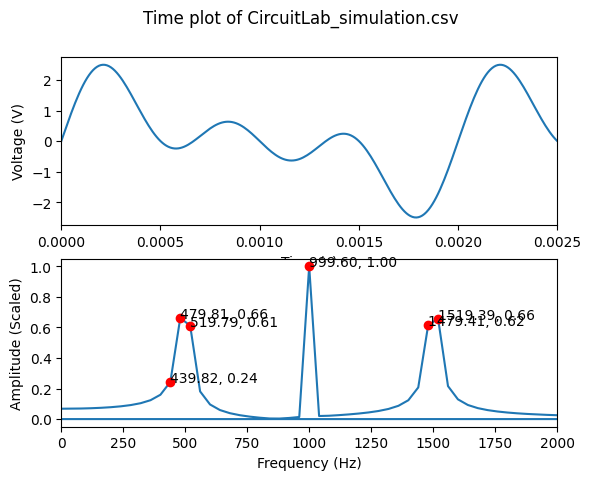

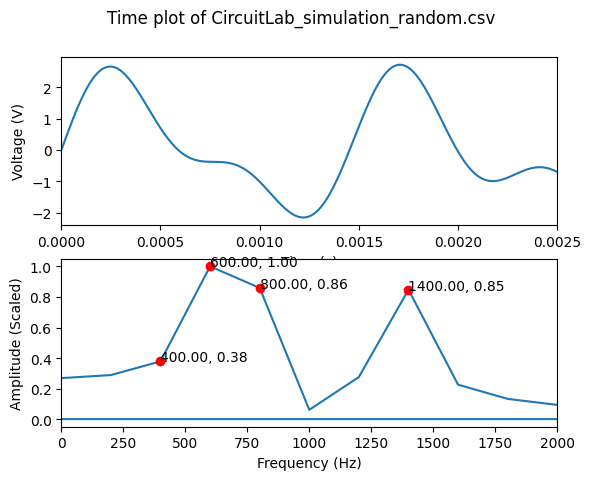

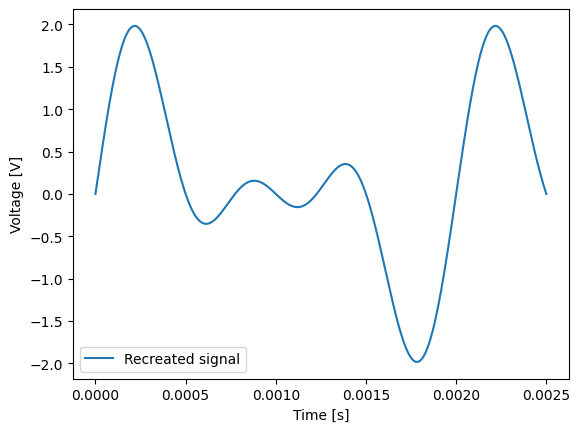

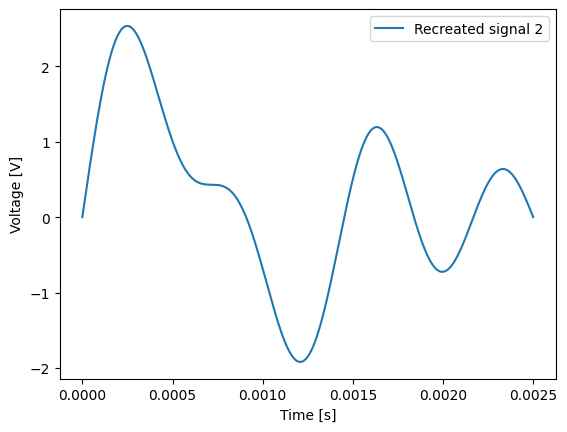

In [17]:
%run FFT.py -f "CircuitLab_simulation.csv" -x 0.0025,2000 -s 1 -d y --plotting both
%run FFT.py -f "CircuitLab_simulation_random.csv" -x 0.0025,2000 -s 1 -d y --plotting both

import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 0.0025, 1000)
sig = 0.66 * np.sin(2 * np.pi * 500 * t) + 1 * np.sin(2 * np.pi * 1000 * t) + 0.66 * np.sin(2 * np.pi * 1500 * t)

sig2 = 0.38 * np.sin(2 * np.pi * 400 * t) + 1 * np.sin(2 * np.pi * 600 * t) + 0.86 * np.sin(2 * np.pi * 800 * t) + 0.85 * np.sin(2 * np.pi * 1400 * t)

plt.plot(t, sig, label='Recreated signal')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend()

plt.show()
plt.plot(t, sig2, label='Recreated signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend()


# (3) Frequency Spectrum of a Square Wave

A square wave is a **non-sinusoidal periodic waveform** in which the amplitude alternates at a steady frequency between fixed minimum and maximum values, with the same duration at minimum and maximum. In an ideal square wave, the transitions between minimum and maximum are instantaneous. Square wave. (2023, July 9). In Wikipedia. https://en.wikipedia.org/wiki/Square_wave

<img src="3_squarewave_simulated.png" alt="Complex signal example" width="600px">

We have looked at sinusoidal signals and will now move onto more "exotic" signals. A square wave has many applications but can be troublesome to recreate using sinusoidal signals (do you know why?). One of the uses of a square wave is in ADCs (Analog-to-Digital Converters) or in PWM (Pulse-Width Modulation).

On the surface, we can still use the same formula as we have done with sinusoidal signals and get a pretty decent result. Since v(t) is an odd square wave, we are able to negate the $a_n$ part and just focus on the $b_n$ part of the equation. Keeping in mind that the square wave will have $v(t) = 2 V$ for $t = 0 \rightarrow T/2$ and $v(t) = -2 V$ for $t = T/2 \rightarrow T$, we can then reduce the equations to:

\begin{split}
dc &= \frac{1}{T}\int_0^{T} v(t) dt \\
b_n &= \frac{4}{T}\int_0^{T/2} v(t)\cdot \sin(n \omega_0 t) dt
\end{split}

### (a) $d_c$ and $b_n$ Values for $v(t)$

From the equations above, we can calculate the coefficients to create a square wave. We can simplify the expression for $b_n$ by rewriting it to only include one unknown: $n$.

- [ ] find DC, and rewrite the equation for b_n to only include one unknown: n

- [ ] Fill in the table under for $b_n$ and frequency values, for up to 10 harmonics
    - you are well premitted to make your own table in e.i python (or: https://www.tablesgenerator.com in Markdown)

|      | n   | $b_n$ - calc | $b_n$ - measured | Frequency (Hz) | $\omega$ |
| ---- | --- | ------------ | ---------------- | -------------- | -------- |
| DC - value | 0   | ...          | ...              | ...                      |
| Fundamental frequency | 1   | ...          | ...                          | ...      |
| 2nd Harmonic frequency | 2   | ...          | ...                           | ...    |
| ...  | ...   | ...          | ...              | ...              |
| 10th Harmonic frequency | 10   | ...          | ...                     | ...    |

Once we have calculated the $b_n$ values, we can compare our calculated square wave to a "real" square wave using a software that has numerical calculations to match real-world components.

### (b) Two-Stage Summation Circuit

- [ ] Make a **two-stage summation** circuit and use a real square wave (change voltage-sinus component to square wave).

- [ ] Run a time simulation and save the results as a .csv file (you may have to simulate 1000+ periods with a small timestep).

- [ ] Perform an FFT of the result and mark down if the harmonics match your calculated ones.

### (c) Comparison with Calculated Square Wave

- [ ] Make a two-stage summing circuit using your calculated $b_n$ values as voltage sinus sources.

- [ ] Simulate and compare the output of this circuit to the real square wave (either in CircuitLab or in Python).

<span style="font-size: 24px; color: red; font-weight: bold;">Your answer here: <span>

**remember to explain what you are doing, and give reason and full sentences for all you do**

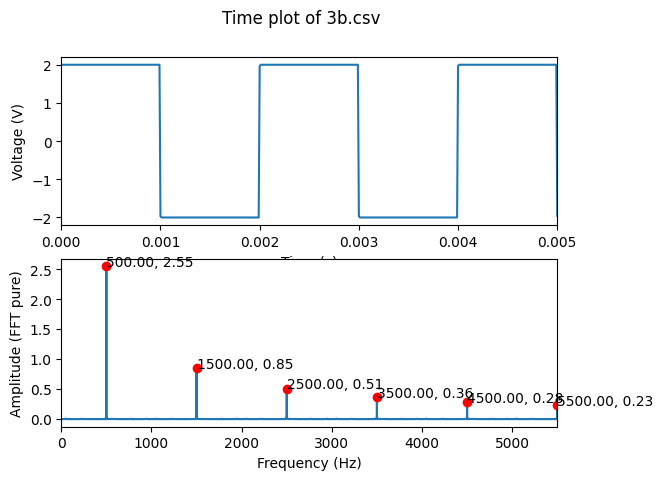

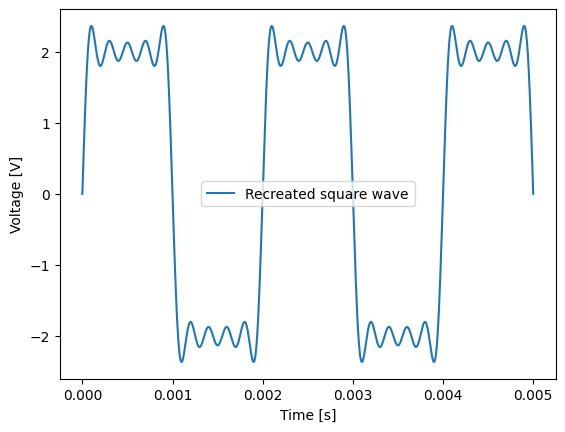

In [19]:
%run FFT.py -f "3b.csv" -x 0.005,5500 -d 20 --plotting both

t = np.linspace(0, 0.005, 1000)
sig = 2.55 * np.sin(2 * np.pi * 500 * t) + 0.85 * np.sin(2 * np.pi * 1500 * t) + 0.51 * np.sin(2 * np.pi * 2500 * t) + 0.36 * np.sin(2 * np.pi * 3500 * t) + 0.28 * np.sin(2 * np.pi * 4500 * t) 
plt.plot(t, sig, label='Recreated square wave')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend()

# (4) Fourier Transformation of a Square Wave When the Period Goes to Infinity

Now, we will investigate what happens when the period of the square wave increases while the pulse width remains the same. The square wave can be described as:

$$v(t) = \begin{cases} 
          1 & t \in [0, 1 \text{ ms}] \\
          0 & t \in [1 \text{ ms}, T] \\
       \end{cases}
$$

Each pulse lasts for 1 ms and is repeated every T ms. We can compare it with a background signal made of 1 ms pulses.

### (a)

- [ ] Make a circuit in the same file as your two-staged summation (the one with the perfect square) that describes the square wave with changing $T$. You may implement it however you like, as long as it manages to describe the formula. A straightforward solution would be using time-controlled switches.

- [ ] Run a time simulation of the new square wave circuit with $T=10 \text{ ms}/30 \text{ ms}/100 \text{ ms}$. **Save the .csv** file. Describe the changes you see in the resulting FFT of these simulations.

The resulting time plot should look something like this (for $T=30 \text{ ms}$):

<img src="4_solution_circuit_per30ms_plot.png" alt="Transient analysis squarewave" width="400px">

<span style="font-size: 24px; color: red; font-weight: bold;">Your answer here: <span>

**remember to explain what you are doing, and give reason and full sentences for all you do**

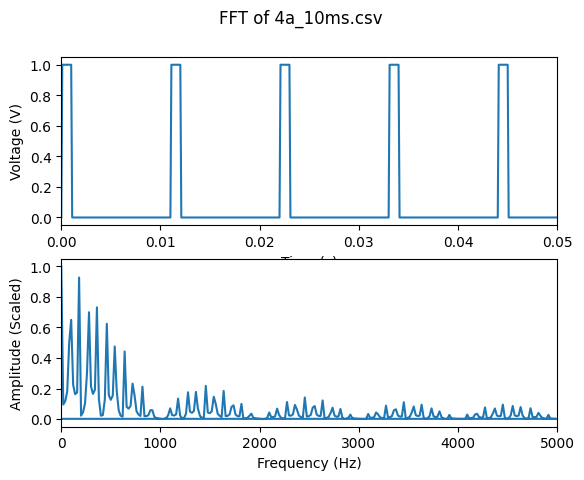

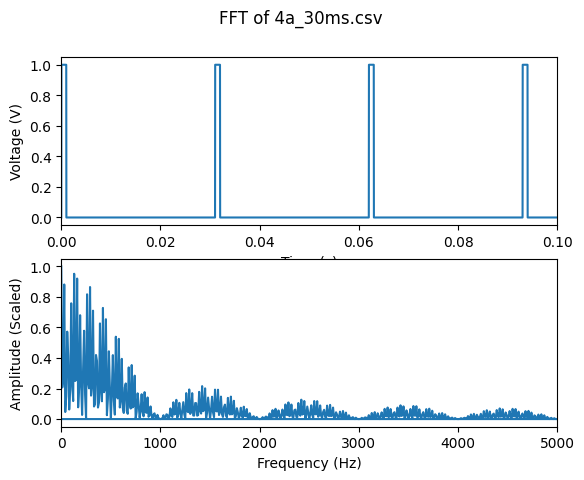

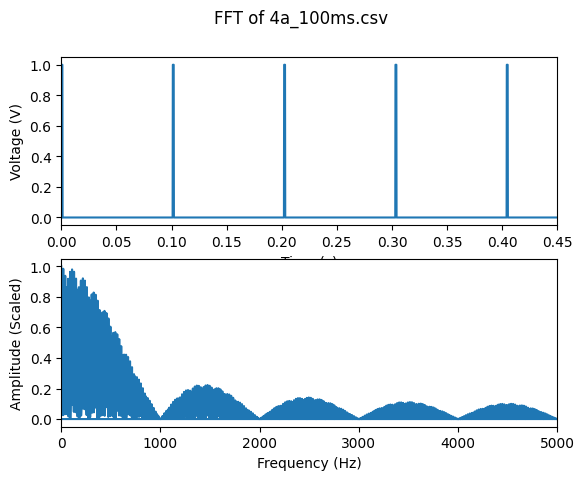

In [6]:
%run FFT.py -f "4a_10ms.csv" -x 0.05,5000 -s 1  --plotting both
%run FFT.py -f "4a_30ms.csv" -x 0.1,5000 -s 1  --plotting both
%run FFT.py -f "4a_100ms.csv" -x 0.45,5000 -s 1  --plotting both


# (5) Frequency Spectrum of a Saw-Tooth Waveform

Now that we have looked at the square wave, we can explore a different form of a periodic signal, the saw-tooth waveform (see: [Wikipedia](https://en.wikipedia.org/wiki/Sawtooth_wave) and pg. 710-717 in the textbook).

A saw-tooth waveform can be described as a series of diagonals described mathematically as $v(t) = at + b$, where 'a' is the slope of the linear function, and 'b' is the DC level of the signal (i.e., $b = v(t = 0)$).

If we want a signal that starts at $v(t = 0) = 0 \text{ V}$ and goes up to $v = 1 \text{ V}$ in a time period of $t = 2 \text{ ms}$, then we have to set $b = 0$ and let $a = 0.5 \text{ V/ms}$. We then get:

$$v(t) = 0.5 \text{ V/ms} \cdot t , t \in [0,...,2 \text{ ms}]$$

### (a)

- [ ] Make a new circuit and plot a perfect square wave alongside a sawtooth. The result should look something like this:

<img src="5_sawtoothsimulation_plus.png" alt="Transient analysis sawtooth" width="600px">

- [ ] Perform the FFT of the sawtooth for 10 harmonics and compare it with the values for the perfect square wave.

|      | n   | $b_n$ - square | $b_n$ - calculated | Frequency (Hz) | $\omega$ |
| ---- | --- | -------------- | ------------------ | -------------- | -------- |
| DC - value | 0   | ...            | ...                | ...                     |
| Fundamental frequency | 1   | ...            | ...                             | ...      |
| 2nd Harmonic frequency | 2   | ...            | ...                            | ...    |
| ...  | ...   | ...            | ...                | ...             |
| 10th Harmonic frequency | 10   | ...            | ...                         | ...    |

- [ ] Make an approximated sawtooth signal and compare it to the real model.

- [ ] Changing the direction of the sawtooth generator (and adding a DC offset), we can "change the direction of the signal". See if you can approximate the signal using your already existing $b_n$ values. (hint pg. 345)

- [ ] what is the linear fuction of this series?

<img src="5_sawtoothsimulation_minus.png" alt="Transient analysis sawtooth wrong way" width="600px">

<span style="font-size: 24px; color: red; font-weight: bold;">Your answer here: <span>

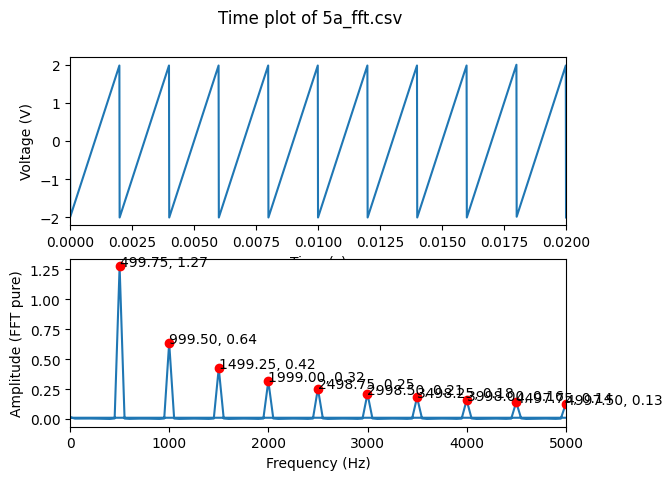

In [30]:
%run FFT.py -f "5a_fft.csv" -x 0.02,5000  -d 11 --plotting both


<img src="sawtooth.png" alt="Text if image not available" width="1000px">
<img src="5a_kretes.png" alt="Text if image not available" width="1000px">
<img src="5a_sawtooth.png" alt="Text if image not available" width="1000px">

